In [44]:
import os, h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from track import SOLAR_LOGG, SOLAR_TEFF, SOLAR_ZX

%matplotlib inline

In [2]:
path = 'data/yrec_grid.h5'
h5f = h5py.File(path, 'r')

dset = h5f['data']
data = np.array(dset)
columns = dset.attrs['columns']
# df = pd.DataFrame(h5f['data'], columns=h5f['data'].attrs['columns'])
h5f.close()

In [3]:
df = pd.DataFrame(data, columns=columns)
df.head()

,EEP,M/Msun,Age(Gyr),[Fe/H],fk,Rocrit,Prot(days),log(Teff)(K),R/Rsun,log(Z/X)(surface)
0,1.000000,1.06,0.036089,0.1,6.0,2.75,0.374777,3.752937,0.987328,-1.692670
1,1.045365,1.06,0.037402,0.1,6.0,2.75,0.383608,3.751863,0.979282,-1.692682
2,1.067487,1.06,0.039110,0.1,6.0,2.75,0.395994,3.751114,0.975430,-1.692698
3,1.069806,1.06,0.041330,0.1,6.0,2.75,0.412794,3.750794,0.975226,-1.692721
4,1.079711,1.06,0.044216,0.1,6.0,2.75,0.435389,3.750821,0.976990,-1.692753


In [4]:
del data

In [23]:
df['log(R/Rsun)'] = np.log10(df['R/Rsun'])
df['log(g)'] = SOLAR_LOGG + np.log10(df['M/Msun']) - 2 * df['log(R/Rsun)']
df['log(L/Lsun)'] = 2 * df['log(R/Rsun)'] + 4 * (df['log(Teff)(K)'] - np.log10(SOLAR_TEFF))

In [84]:
mask = (df['[Fe/H]'] == 0.0) & (df['fk'] == 6.0) & (df['Rocrit'] == 2.75)
print(len(df.loc[mask]))
df.loc[mask].head()

49157


,EEP,M/Msun,Age(Gyr),[Fe/H],fk,Rocrit,Prot(days),log(Teff)(K),R/Rsun,log(Z/X)(surface),log(R/Rsun),log(g),log(L/Lsun),[Fe/H](surface),log(Prot)(days)
1305743,1.000000,0.96,0.042066,0.0,6.0,2.75,0.395332,3.749484,0.836123,-1.787095,-0.077730,4.576131,-0.204033,-0.148823,-0.403038
1305744,1.023301,0.96,0.044457,0.0,6.0,2.75,0.408098,3.748523,0.833130,-1.787112,-0.079287,4.579245,-0.210992,-0.148840,-0.389236
1305745,1.029044,0.96,0.047567,0.0,6.0,2.75,0.425779,3.747965,0.832576,-1.787135,-0.079576,4.579824,-0.213800,-0.148863,-0.370816
1305746,1.035474,0.96,0.051609,0.0,6.0,2.75,0.449842,3.747710,0.833403,-1.787165,-0.079145,4.578961,-0.213960,-0.148893,-0.346940
1305747,1.045097,0.96,0.056864,0.0,6.0,2.75,0.482789,3.747613,0.834692,-1.787204,-0.078474,4.577619,-0.213004,-0.148932,-0.316242


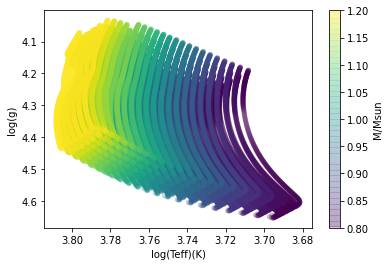

In [26]:
fig, ax = plt.subplots()

df.loc[mask].sort_values('M/Msun').plot(x='log(Teff)(K)', y='log(g)', 
                                        c='M/Msun', cmap='viridis', alpha=0.2, 
                                        kind='scatter', ax=ax);

ax.invert_xaxis()
ax.invert_yaxis();

In [35]:
df['[Fe/H](surface)'] = df['log(Z/X)(surface)'] - np.log10(0.023)

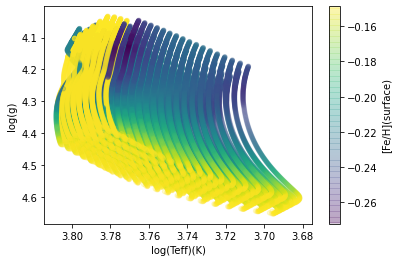

In [36]:
fig, ax = plt.subplots()

df.loc[mask].sort_values('M/Msun').plot(x='log(Teff)(K)', y='log(g)', 
                                        c='[Fe/H](surface)', cmap='viridis', alpha=0.2, 
                                        kind='scatter', ax=ax);

ax.invert_xaxis()
ax.invert_yaxis();

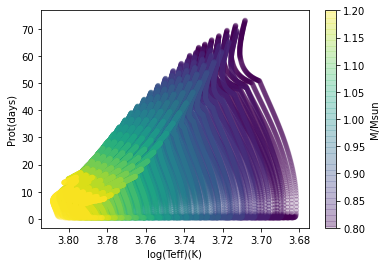

In [41]:
fig, ax = plt.subplots()

df.loc[mask].sort_values('M/Msun').plot(x='log(Teff)(K)', y='Prot(days)', 
                                        c='M/Msun', cmap='viridis', alpha=0.2, 
                                        kind='scatter', ax=ax);

ax.invert_xaxis()

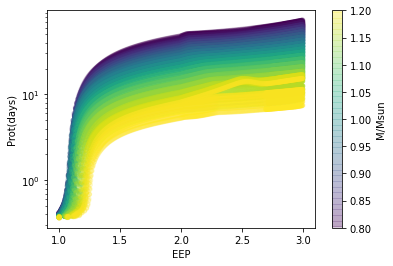

In [46]:
fig, ax = plt.subplots()

df.loc[mask].sort_values('M/Msun').plot(x='EEP', y='Prot(days)', 
                                        c='M/Msun', cmap='viridis', alpha=0.2, 
                                        kind='scatter', ax=ax);

ax.set_yscale('log')

A bunch of tracks are calculated without diffusion

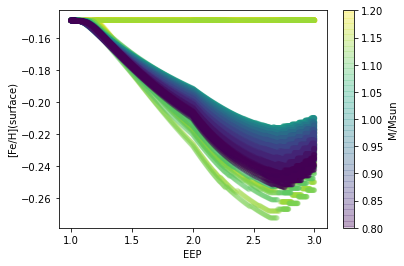

In [126]:
fig, ax = plt.subplots()

df.loc[mask].sort_values('M/Msun', ascending=False).plot(x='EEP', y='[Fe/H](surface)', 
                                        c='M/Msun', cmap='viridis', alpha=0.2, 
                                        kind='scatter', ax=ax);

In [98]:
len(df.loc[df['EEP'] == 1, '[Fe/H](surface)']) == len(df.loc[df['EEP'] == 2, '[Fe/H](surface)'])

True

Lets see how many.

In [113]:
non_diff = df.loc[df['EEP'] == 1, '[Fe/H](surface)'].to_numpy() == df.loc[df['EEP'] == 2, '[Fe/H](surface)'].to_numpy()
np.sum(non_diff)

21140

In [104]:
start = df.loc[df['EEP'] == 1, '[Fe/H](surface)'].index.to_numpy()
stop = df.loc[df['EEP'] == 3, '[Fe/H](surface)'].index.to_numpy()

The grid is in track order so we can 

In [123]:
non_diff_idx = np.concatenate([np.arange(st, sp, dtype=int) for st, sp in zip(start[non_diff], stop[non_diff])])

In [125]:
len(non_diff_idx) / len(df)

0.16212205113204597

16 % of the tracks have no diffusion, the neural network should be able to learn this.

There may be some tracks with a rotation of 0 which must have been mistakes.

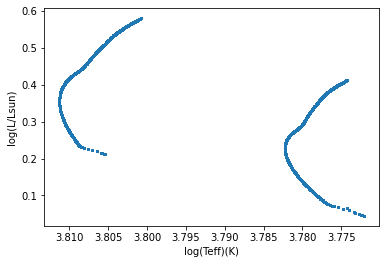

In [72]:
mask = df['Prot(days)']==0
ax = df.loc[mask].plot(x='log(Teff)(K)', y='log(L/Lsun)', kind='scatter', s=1)

ax.invert_xaxis()

This is not an issue, lets check how many points it is...

In [73]:
len(df.loc[mask])

99120

In [74]:
len(df)

48158961

In [78]:
df.drop(df.loc[mask].index, inplace=True)

In [79]:
df['log(Prot)(days)'] = np.log10(df['Prot(days)'])

In [80]:
input_cols = ['EEP', 'M/Msun', '[Fe/H]', 'fk', 'Rocrit']
output_cols = ['log(Teff)(K)', 'log(R/Rsun)', '[Fe/H](surface)', 'log(Prot)(days)']

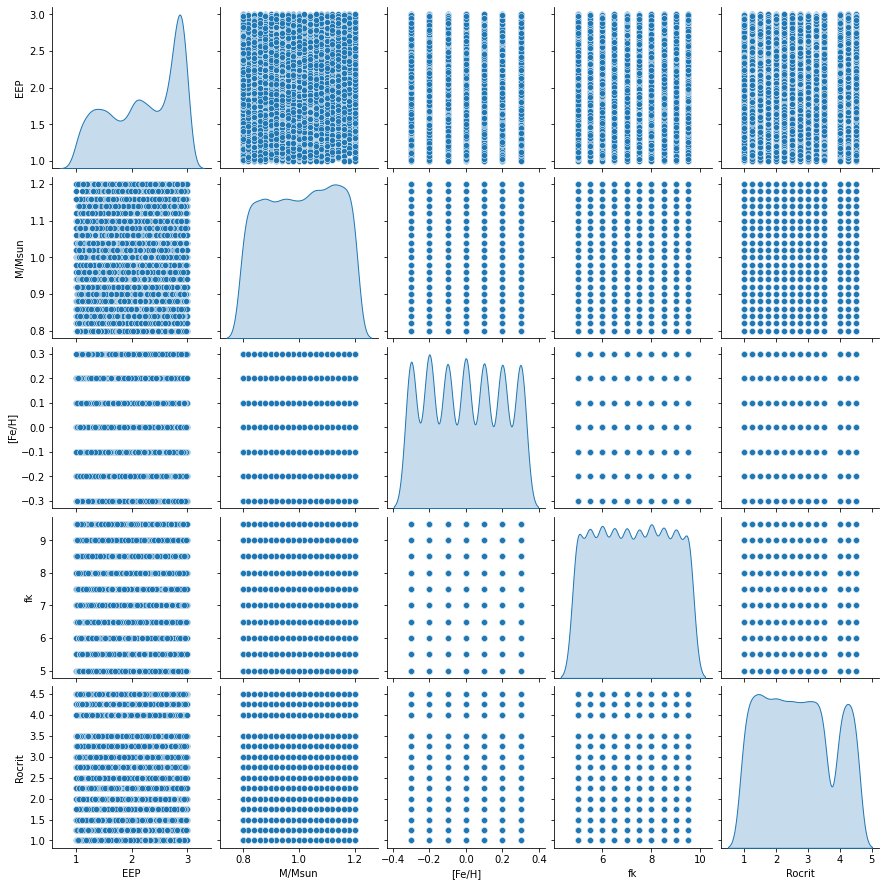

In [81]:
sns.pairplot(df[input_cols].sample(10000), diag_kind='kde');

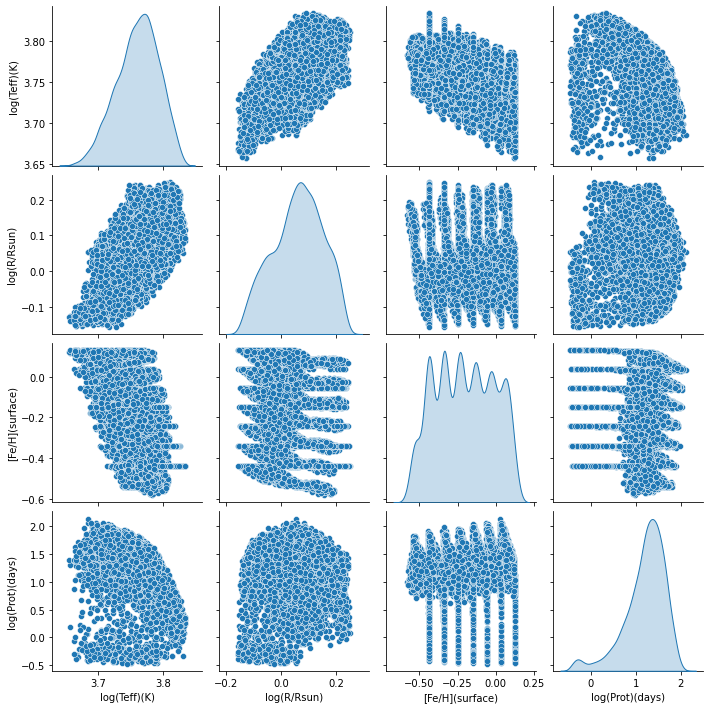

In [82]:
sns.pairplot(df[output_cols].sample(10000), diag_kind='kde');